In [3]:
from keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(224, 224, 3))


/home/sunw71/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [22]:
import h5py
from keras.utils import to_categorical
db_train = h5py.File('datasets/m_tank_train/hdf5/features.hdf5', "r")
db_val = h5py.File('datasets/m_tank_val/hdf5/features.hdf5', "r")
train_features = db_train['features'][:]
val_features = db_val['features'][:]
train_labels = to_categorical(db_train['labels'])
val_labels = to_categorical(db_val['labels'])
db_train.close()
db_val.close()
train_features

array([[0.        , 0.98706108, 1.28077734, ..., 0.09847222, 0.        ,
        1.33031344],
       [0.        , 0.35714298, 0.4479363 , ..., 0.05974788, 0.        ,
        1.01755226],
       [0.02479883, 1.14340997, 2.33661079, ..., 0.56856543, 0.05325577,
        0.78915429],
       ...,
       [0.00244986, 0.10468059, 1.28219748, ..., 1.75204217, 0.        ,
        0.        ],
       [0.00826186, 0.02070925, 1.20814586, ..., 0.42759702, 0.03103134,
        0.07211632],
       [0.021031  , 0.84913719, 1.23313236, ..., 0.45761144, 0.        ,
        0.99088925]])

In [51]:
from keras import models
from keras import layers
from keras import optimizers
from pyimagesearch.io import HDF5DatasetGenerator

model = models.Sequential()
model.add(layers.Dense(1024, activation = "relu", input_dim = 2048))
model.add(layers.Dropout(0.5))
#model.add(layers.Dense(512, activation = "relu"))
#model.add(layers.BatchNormalization())
model.add(layers.Dense(205, activation = 'softmax'))

model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
             loss = 'categorical_crossentropy',
             metrics=['acc'])

history = model.fit(train_features,train_labels,
                   epochs=100,
                   batch_size=1024,
                   validation_data=(val_features,val_labels))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
12000/12000 [==============================] - 2s 179us/step - loss: 5.3988 - acc: 0.0210 - val_loss: 5.0571 - val_acc: 0.0453
Epoch 2/100
12000/12000 [==============================] - 0s 22us/step - loss: 4.9227 - acc: 0.0624 - val_loss: 4.9117 - val_acc: 0.0637
Epoch 3/100
12000/12000 [==============================] - 0s 22us/step - loss: 4.6618 - acc: 0.1004 - val_loss: 4.7901 - val_acc: 0.0793
Epoch 4/100
12000/12000 [==============================] - 0s 23us/step - loss: 4.4497 - acc: 0.1311 - val_loss: 4.6764 - val_acc: 0.0943
Epoch 5/100
12000/12000 [==============================] - 0s 22us/step - loss: 4.2343 - acc: 0.1661 - val_loss: 4.5772 - val_acc: 0.1010
Epoch 6/100
12000/12000 [==============================] - 0s 24us/step - loss: 4.0619 - acc: 0.1893 - val_loss: 4.4861 - val_acc: 0.1150
Epoch 7/100
12000/12000 [==============================] - 0s 25us/step - loss: 3.8756 - acc: 0.2176 - val_loss: 4.4048 - 

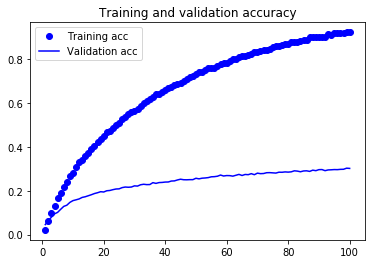

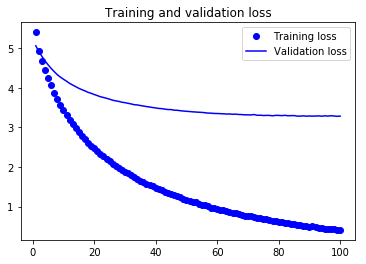

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [53]:
from pyimagesearch.utils.ranked import rank5_accuracy
db_test = h5py.File('datasets/m_tank_test/hdf5/test_features.hdf5', "r")
test_features = db_test['features'][:]
test_labels =db_test['labels'][:]
preds = model.predict_proba(test_features)
(rank1, rank5) = rank5_accuracy(preds, test_labels)
print("[INFO] rank-1: {:.2f}%".format(rank1 * 100))
print("[INFO] rank-5: {:.2f}%".format(rank5 * 100))
db_test.close()


[INFO] rank-1: 19.18%
[INFO] rank-5: 46.14%


In [5]:
import h5py
from keras.utils import to_categorical
db_train = h5py.File('datasets/m_tank_train/hdf5/densnet_features.hdf5', "r")
db_val = h5py.File('datasets/m_tank_val/hdf5/densnet_features.hdf5', "r")
train_features = db_train['features'][:]
val_features = db_val['features'][:]
train_labels = to_categorical(db_train['labels'])
val_labels = to_categorical(db_val['labels'])
db_train.close()
db_val.close()


In [13]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation = "relu", input_dim = 1920))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(205, activation = 'softmax'))

model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
             loss = 'categorical_crossentropy',
             metrics=['acc'])

history = model.fit(train_features,train_labels,
                   epochs=40,
                   batch_size=1024,
                   validation_data=(val_features,val_labels))

model.compile(optimizer = optimizers.RMSprop(lr=1e-5),
             loss = 'categorical_crossentropy',
             metrics=['acc'])
history = model.fit(train_features,train_labels,
                   epochs=40,
                   batch_size=1024,
                   validation_data=(val_features,val_labels))

Train on 12000 samples, validate on 3000 samples
Epoch 1/40
12000/12000 [==============================] - 1s 51us/step - loss: 5.9339 - acc: 0.0083 - val_loss: 5.4879 - val_acc: 0.0060
Epoch 2/40
12000/12000 [==============================] - 0s 17us/step - loss: 5.7969 - acc: 0.0115 - val_loss: 5.4749 - val_acc: 0.0080
Epoch 3/40
12000/12000 [==============================] - 0s 17us/step - loss: 5.6616 - acc: 0.0135 - val_loss: 5.4723 - val_acc: 0.0087
Epoch 4/40
12000/12000 [==============================] - 0s 19us/step - loss: 5.5927 - acc: 0.0178 - val_loss: 5.4841 - val_acc: 0.0123
Epoch 5/40
12000/12000 [==============================] - 0s 17us/step - loss: 5.5126 - acc: 0.0231 - val_loss: 5.4907 - val_acc: 0.0140
Epoch 6/40
12000/12000 [==============================] - 0s 18us/step - loss: 5.4411 - acc: 0.0284 - val_loss: 5.4932 - val_acc: 0.0123
Epoch 7/40
12000/12000 [==============================] - 0s 18us/step - loss: 5.3385 - acc: 0.0343 - val_loss: 5.5087 - val_acc:

Epoch 20/40
12000/12000 [==============================] - 0s 18us/step - loss: 3.9414 - acc: 0.1867 - val_loss: 5.4359 - val_acc: 0.0430
Epoch 21/40
12000/12000 [==============================] - 0s 18us/step - loss: 3.9390 - acc: 0.1849 - val_loss: 5.4398 - val_acc: 0.0437
Epoch 22/40
12000/12000 [==============================] - 0s 16us/step - loss: 3.9557 - acc: 0.1871 - val_loss: 5.4417 - val_acc: 0.0433
Epoch 23/40
12000/12000 [==============================] - 0s 16us/step - loss: 3.9442 - acc: 0.1934 - val_loss: 5.4429 - val_acc: 0.0440
Epoch 24/40
12000/12000 [==============================] - 0s 16us/step - loss: 3.9464 - acc: 0.1864 - val_loss: 5.4441 - val_acc: 0.0437
Epoch 25/40
12000/12000 [==============================] - 0s 17us/step - loss: 3.9349 - acc: 0.1934 - val_loss: 5.4482 - val_acc: 0.0433
Epoch 26/40
12000/12000 [==============================] - 0s 17us/step - loss: 3.9232 - acc: 0.1917 - val_loss: 5.4480 - val_acc: 0.0430
Epoch 27/40
12000/12000 [=========

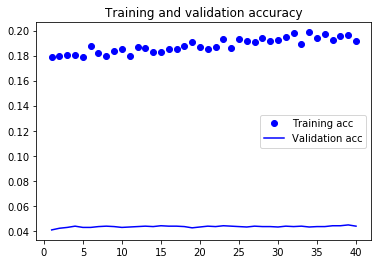

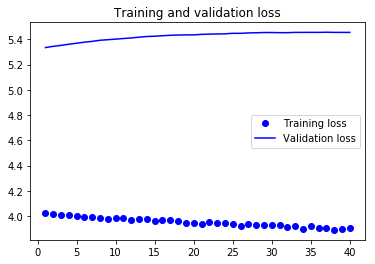

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()